In [1]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [2]:
#importing data
faces_people = fetch_lfw_people(min_faces_per_person=35, resize=0.4)
#print(faces_people)
n_samples, h, w = faces_people.images.shape
np.random.seed(50)
x = faces_people.data
n_features = x.shape[1]
print(x.shape)
y = faces_people.target
target_names = faces_people.target_names
n_classes = target_names.shape[0]

(2053, 1850)


In [3]:
print("size of dataset")
print("n_samples : {0} {1}".format(n_samples,"rows"))
print("n_features: {0} {1}".format(n_features,"columns"))
print("n_classes : {0} {1}".format(n_classes,"labels"))

size of dataset
n_samples : 2053 rows
n_features: 1850 columns
n_classes : 24 labels


In [4]:
#splitting dataset into train(75%) and test(25%) datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [5]:
#dimensionality reduction
n_components = 60
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(x_train)

In [6]:
#conversion to eigen vector/eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

In [7]:
#pca on x_train,x_test
x_train_ = pca.transform(x_train)
x_test_ = pca.transform(x_test)

In [8]:
#code to figure out ideal hyper-parameters for respective classifier
print("training the dataset on classifier...")
params = {'C': [0.1, 0.7, 2, 10, 47],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), params)
clf = clf.fit(x_train_, y_train)
print("\n Best estimator found by grid search:\n")
print(clf.best_estimator_)

training the dataset on classifier...

 Best estimator found by grid search:

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [9]:
#prediction of class labels of data points in x_test
y_pred = clf.predict(x_test_)
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.75      0.27      0.40        11
             Alvaro Uribe       0.88      0.58      0.70        12
             Andre Agassi       0.40      0.22      0.29         9
             Ariel Sharon       0.70      0.82      0.76        17
    Arnold Schwarzenegger       0.50      0.33      0.40        12
             Colin Powell       0.86      0.78      0.82        78
          Donald Rumsfeld       0.59      0.83      0.69        23
            George W Bush       0.78      0.89      0.83       130
        Gerhard Schroeder       0.47      0.83      0.60        18
  Gloria Macapagal Arroyo       1.00      1.00      1.00        13
                Hans Blix       0.75      0.43      0.55         7
              Hugo Chavez       0.55      0.55      0.55        11
           Jacques Chirac       1.00      0.38      0.55        16
            Jean Chretien       0.71      0.83      0.77     

In [10]:
def title(y_pred, y_test, target_names, i):
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    
    predicted_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    
    return 'predicted: %s\ntrue:      %s' % (predicted_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

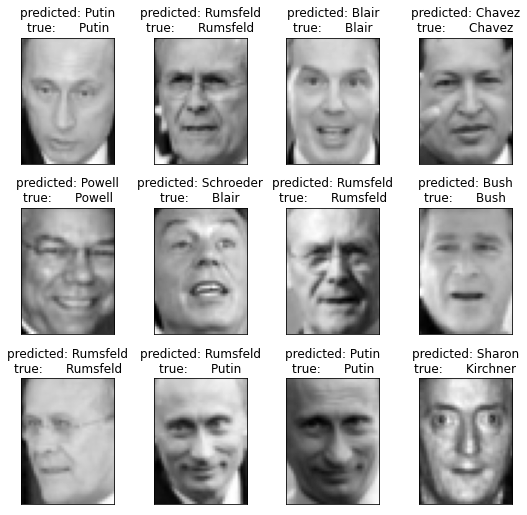

In [11]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(x_test, prediction_titles, h, w)

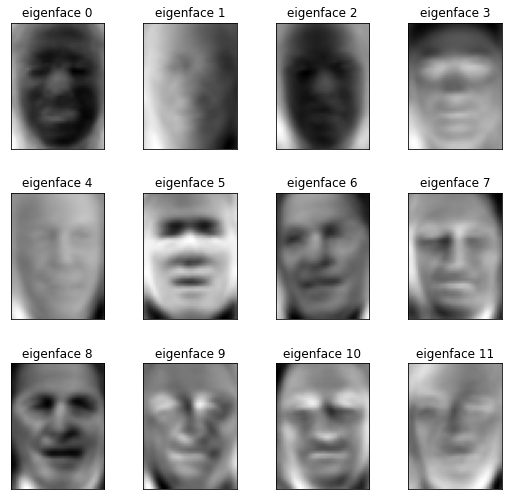

In [12]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

TEST CONFUSION MATRIX :
[[  3   0   0   1   1   0   0   1   0   0   0   2   0   0   0   1   0   0
    0   0   0   0   2   0]
 [  0   7   0   0   1   0   0   1   0   0   1   0   0   0   1   0   0   0
    0   0   0   0   0   1]
 [  0   0   2   2   0   0   1   2   0   0   0   0   0   1   1   0   0   0
    0   0   0   0   0   0]
 [  0   0   0  14   0   1   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   4   0   0   1   2   0   0   0   0   0   1   0   1   0
    0   0   0   0   3   0]
 [  1   0   1   2   0  61   2   3   0   0   0   1   0   0   0   1   0   0
    0   0   1   0   2   3]
 [  0   0   1   0   0   0  19   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1]
 [  0   1   0   0   0   3   3 116   3   0   0   0   0   0   0   1   0   0
    1   0   1   0   1   0]
 [  0   0   0   0   1   0   0   1  15   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13   0   0   0   0   0   0  

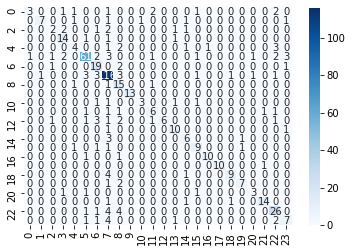

In [13]:
#performance metrics
matrix_val=confusion_matrix(y_test, y_pred, labels=range(n_classes))
print("TEST CONFUSION MATRIX :")
print(matrix_val)
#test confusion matrix

confusion_matrix= np.array(matrix_val)
import seaborn as sns
import matplotlib.pyplot as plt
print("Heat map of confusion matrix")
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Blues')


In [14]:
#brute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model : {0}{1}".format(accuracy*100,"%"))

Accuracy of the model : 73.92996108949417%


# New Section